# Problem Statement: 

A Company wants to automate the loan eligibility process based on customer details 
provided while filling online application form. The details filled by the customer 
are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, 
Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)

2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

3.)If customer is not eligible for the input required amount and duration:
    
    a.)what can be amount for the given duration.(Regression)
    
    b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
train_df=pd.read_csv("training_set.csv")
test_df=pd.read_csv("testing_set.csv")

In [3]:
train=train_df
test=test_df

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.shape

(614, 13)

In [6]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
test_df.shape

(367, 12)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [9]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# EDA

<AxesSubplot:>

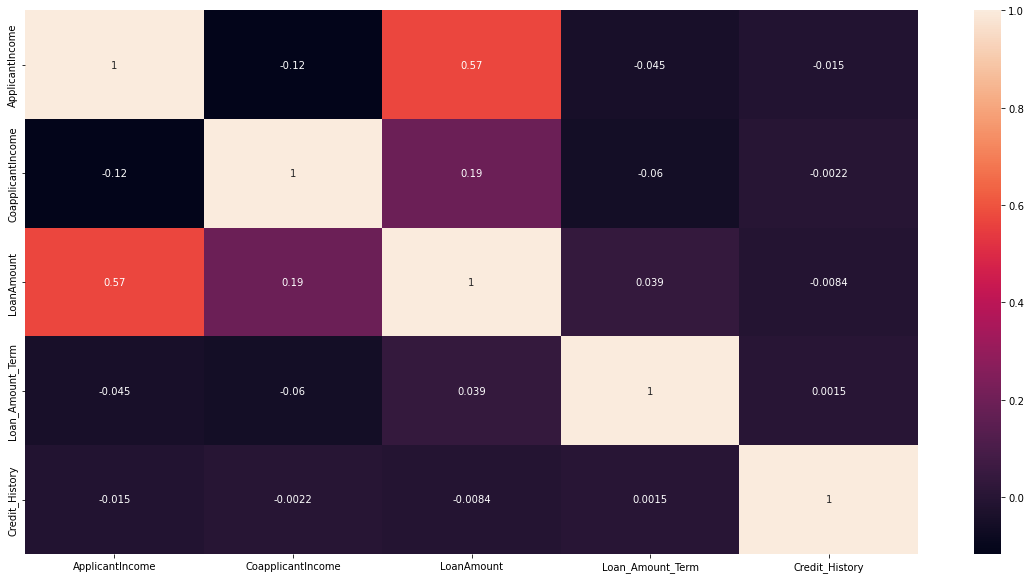

In [10]:
cor=train_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

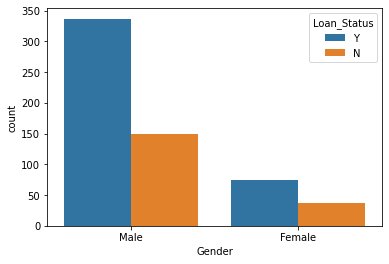

In [11]:
sns.countplot(x='Gender',hue='Loan_Status',data=train_df)

<AxesSubplot:xlabel='Married', ylabel='count'>

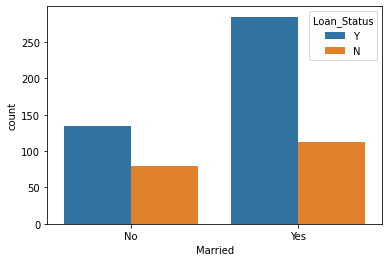

In [12]:
sns.countplot(x='Married',hue='Loan_Status',data=train_df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

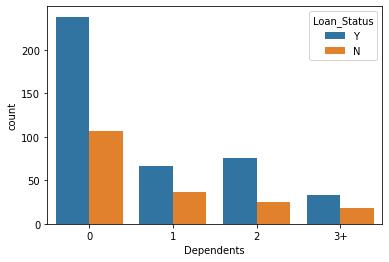

In [13]:
sns.countplot(x='Dependents',hue='Loan_Status',data=train_df)

<AxesSubplot:xlabel='Education', ylabel='count'>

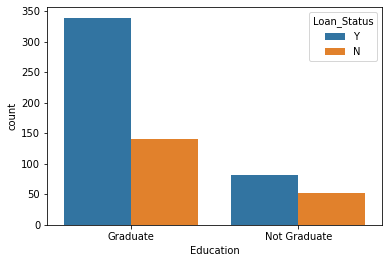

In [14]:
sns.countplot(x='Education',hue='Loan_Status',data=train_df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

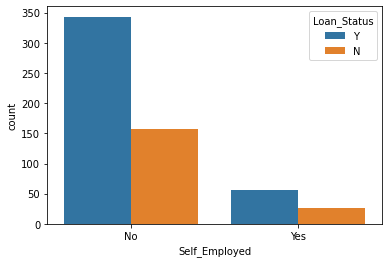

In [15]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train_df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

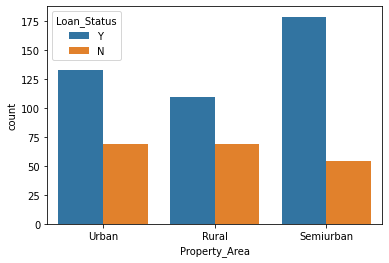

In [16]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train_df)

High count of loan approval is for:-

who are male,married,has no dependents,graduated and not self employed

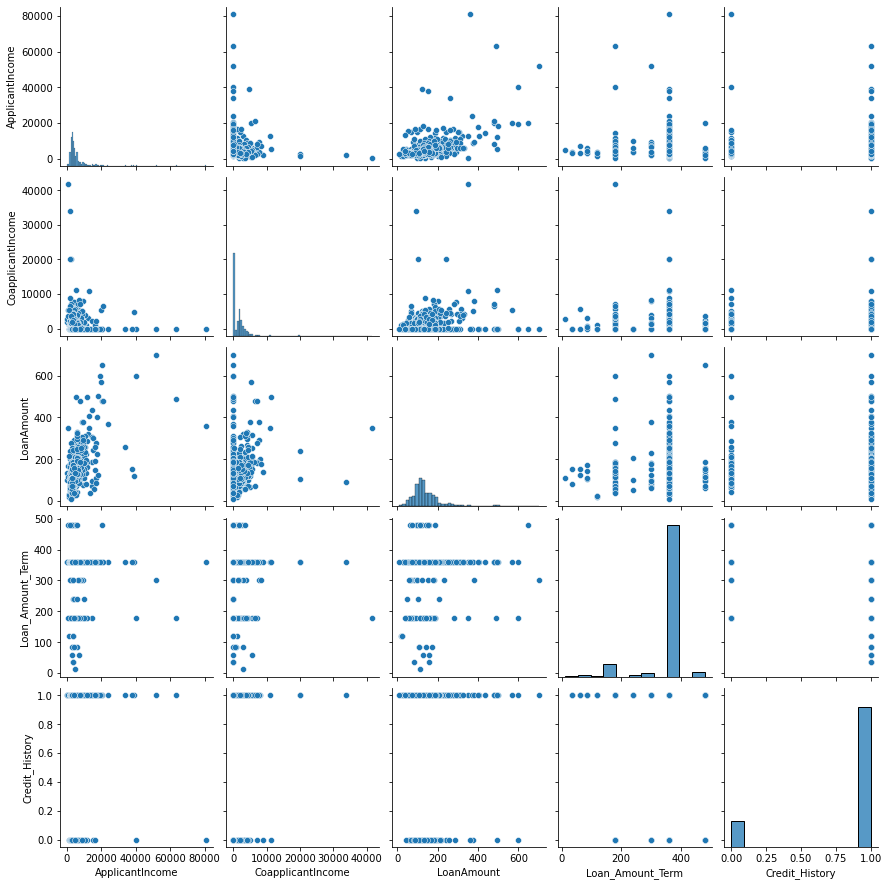

In [17]:
sns.pairplot(train_df)

# Handling Missing Values

In [18]:
train_df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0],inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0],inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0],inplace=True)
train_df['Education'].fillna(train_df['Education'].mode()[0],inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0],inplace=True)

In [21]:
train_df['ApplicantIncome'].fillna(train_df['ApplicantIncome'].mean(),inplace=True)
train_df['CoapplicantIncome'].fillna(train_df['CoapplicantIncome'].mean(),inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(),inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean(),inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mean(),inplace=True)

In [22]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0],inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0],inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0],inplace=True)

In [23]:
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(),inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mean(),inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mean(),inplace=True)

# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

In [24]:
#We will Add Applicant income and coapplicant income to make total income

train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
test_df['Total_Income']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

In [25]:
train_df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
test_df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

# Splitting the Data

In [26]:
x=train_df.drop(['Loan_ID','Loan_Status'],axis=1)
y=train_df['Loan_Status']
z=test_df.drop(['Loan_ID'],axis=1)

# Label_Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 

In [28]:
cols = x.select_dtypes(include='object').columns

for c in cols: 
    x[c]=lbl.fit_transform(list(x[c].values)) 

print('Shape all_data: {}'.format(x.shape))

Shape all_data: (614, 10)


In [29]:
cols = z.select_dtypes(include='object').columns

for c in cols: 
    z[c]=lbl.fit_transform(list(z[c].values)) 

print('Shape all_data: {}'.format(z.shape))

Shape all_data: (367, 10)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

# LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_model=LogisticRegression()
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [34]:
lr_model.score(xtrain,ytrain)

0.8044806517311609

In [35]:
lr_model.score(xtest,ytest)

0.8211382113821138

# DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_model=DecisionTreeClassifier(random_state=101)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=101)

In [38]:
dt_model.score(xtrain,ytrain)

1.0

In [39]:
dt_model.score(xtest,ytest)

0.6585365853658537

# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_model=RandomForestClassifier(random_state=101)
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=101)

In [42]:
rf_model.score(xtrain,ytrain)

1.0

In [43]:
rf_model.score(xtest,ytest)

0.8130081300813008

# RandomizedSearchCV using random forest model

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
rf_model  = RandomForestClassifier(random_state=101)

hyp = {'max_depth':np.arange(2,10),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15)}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=9)

rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [46]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=12, min_samples_split=8,
                       random_state=101)

In [47]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=12, min_samples_split=8,
                       random_state=101)

In [48]:
rf_model.score(xtrain,ytrain)

0.8065173116089613

In [49]:
rf_model.score(xtest,ytest)

0.8211382113821138

In [50]:
y_predicted=rf_model.predict(z)

In [51]:
y_predicted

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [52]:
loan_status=pd.DataFrame(y_predicted,columns=['Loan_Status'])

submit=pd.concat([test_df['Loan_ID'],loan_status],axis=1)
#submit.columns=['Loan_ID','Loan_Status']
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# 2.
Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

# KMeans Clustering

In [53]:
from sklearn.cluster import KMeans
wcss=[]

In [54]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

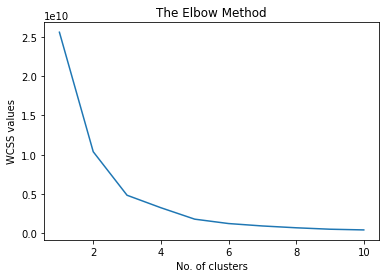

In [55]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS values")
plt.show()

From Elbow method we got 3 clusters

In [56]:
kmeans_model=KMeans(n_clusters=3,random_state=101)
y_means=kmeans_model.fit_predict(z)

In [57]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
loan_status1=pd.DataFrame(y_means)

submit1=pd.concat([test_df['Loan_ID'],loan_status],axis=1)
submit1.columns=['Loan_ID','Loan_Status']
submit1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# 3
If customer is not eligible for the input required amount and duration:
A). what can be amount for the given duration.(Regression)

In [59]:
#train_df2 contains data whose loan has been sanctioned (from main training data)

train_df2=train_df[train_df.Loan_Status=='Y']

In [60]:
# test_df2 contains data whose loan has been rejected (on testing data for which we have done predictions in problem 1)

test_df2=test_df.join(loan_status)
test_df2=test_df2[test_df2.Loan_Status=='N']

In [61]:
#Reindexing

train_df2.index = range(0,train_df2.shape[0])
test_df2.index = range(0,test_df2.shape[0])

In [62]:
train_df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0
4,LP001011,Male,Yes,2,Graduate,Yes,267.000000,360.0,1.0,Urban,Y,9613.0


In [63]:
test_df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
0,LP001056,Male,Yes,2,Not Graduate,No,147.0,360.0,0.0,Rural,3881,N
1,LP001094,Male,Yes,2,Graduate,No,166.0,360.0,0.0,Semiurban,12173,N
2,LP001153,Male,No,0,Graduate,No,148.0,360.0,0.0,Rural,24000,N
3,LP001203,Male,No,0,Graduate,No,176.0,360.0,0.0,Semiurban,3150,N
4,LP001313,Male,No,0,Graduate,No,130.0,360.0,0.0,Urban,2750,N


In [64]:
train_df22=train_df2.drop(['Loan_ID','Loan_Status'],axis=1)
test_df22=test_df2.drop(['Loan_ID','Loan_Status'],axis=1)

In [65]:
y=train_df22['LoanAmount']
x=train_df22.drop(['LoanAmount'],axis=1)
z=test_df22.drop(['LoanAmount'],axis=1)

In [66]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 

In [67]:
cols = x.select_dtypes(include='object').columns

for c in cols: 
    x[c]=lbl.fit_transform(list(x[c].values)) 

print('Shape all_data: {}'.format(x.shape))

Shape all_data: (422, 9)


In [68]:
cols = z.select_dtypes(include='object').columns

for c in cols: 
    z[c]=lbl.fit_transform(list(z[c].values)) 

print('Shape all_data: {}'.format(z.shape))

Shape all_data: (59, 9)


In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

# KNeighborsRegressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [71]:
knr_model=KNeighborsRegressor()
knr_model.fit(xtrain,ytrain)

KNeighborsRegressor()

In [72]:
ypred_knr=knr_model.predict(xtrain)

MSE=mean_squared_error(ytrain,ypred_knr)
MSE

3393.296908527744

In [73]:
ypred_knr=knr_model.predict(xtest)

MSE=mean_squared_error(ytest,ypred_knr)
MSE

3951.520640377261

# DecisionTreeRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
D_tree=DecisionTreeRegressor(random_state=101)
D_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=101)

In [76]:
ypred_dt=D_tree.predict(xtrain)

MSE=mean_squared_error(ytrain,ypred_dt)
MSE

0.3798219584569733

In [77]:
ypred_dt=D_tree.predict(xtest)

MSE=mean_squared_error(ytest,ypred_dt)
MSE

7575.497728591071

# RandomForestRegressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rfr=RandomForestRegressor(random_state=101)
rfr.fit(xtrain,ytrain)

RandomForestRegressor(random_state=101)

In [80]:
ypred_rf=rfr.predict(xtrain)

MSE=mean_squared_error(ytrain,ypred_rf)
MSE

784.2133370886826

In [81]:
ypred_rf=rfr.predict(xtest)

MSE=mean_squared_error(ytest,ypred_rf)
MSE

3840.7372075592

# RandomizedSearchCV using random forest model

In [82]:
rf_model = RandomForestRegressor(random_state=101)

hyp = {'n_estimators':np.arange(5,100,5),'criterion':['mae','mse'],
        'max_depth':np.arange(1,20),'min_samples_split':np.arange(2,10),
        'min_samples_leaf':np.arange(1,10),'max_features':['sqrt','log2']}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=6)
rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(random_state=101),
                   param_distributions={'criterion': ['mae', 'mse'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])})

In [83]:
rscv_rf_model.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=6, max_features='sqrt',
                      min_samples_leaf=9, min_samples_split=9, n_estimators=50,
                      random_state=101)

In [84]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='sqrt',
                      min_samples_leaf=9, min_samples_split=9, n_estimators=50,
                      random_state=101)

In [85]:
ypredtrain = rf_model.predict(xtrain)

MSE = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',MSE)

Mean squared error: 4010.5033419314


In [86]:
ypredtest = rf_model.predict(xtest)

MSE = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',MSE)

Mean squared error: 4726.937737288817


In [87]:
y_predicted=rf_model.predict(z)

In [88]:
loan_amount_new = pd.DataFrame(y_predicted,columns=["LoanAmount_New"])
final = test_df2.join(loan_amount_new)[["Loan_ID","Loan_Status","LoanAmount","LoanAmount_New"]]
final.head(5)

,Loan_ID,Loan_Status,LoanAmount,LoanAmount_New
0,LP001056,N,147.0,116.730239
1,LP001094,N,166.0,228.425832
2,LP001153,N,148.0,204.419116
3,LP001203,N,176.0,101.280537
4,LP001313,N,130.0,96.932475


# Conclusion:
3.A:In above final result, 

LoanAmount shows actual loan amount while they applied and got rejected.

LoanAmount_New shows revised amount for which there loan may get appproval based on previously loan approved data

# 3b
If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [89]:
# train_df3 contains data whose loan has been approved(from main training data)

train_df3=train[train.Loan_Status=='Y']

In [90]:
train_df3['Gender'].fillna(train_df3['Gender'].mode()[0],inplace=True)
train_df3['Married'].fillna(train_df3['Married'].mode()[0],inplace=True)
train_df3['Dependents'].fillna(train_df3['Dependents'].mode()[0],inplace=True)
train_df3['Education'].fillna(train_df3['Education'].mode()[0],inplace=True)
train_df3['Self_Employed'].fillna(train_df3['Self_Employed'].mode()[0],inplace=True)

In [91]:
# test_df3 contains data whose loan has been rejected & loan amount term <= 240
#(on testing data for which we have done predictions in problem 1)


test_df3 = test.join(loan_status)
test_df3 = test_df3[(test_df3.Loan_Status == 'N') & (test_df3.Loan_Amount_Term <= 240)]

In [92]:
train_df3.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Income'],
      dtype='object')

In [93]:
test_df3.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Total_Income', 'Loan_Status'],
      dtype='object')

In [94]:
train_df3.shape

(422, 12)

In [95]:
test_df3.shape

(5, 12)

In [96]:
#Reindexing

train_df3.index = range(0,train_df3.shape[0])
test_df3.index = range(0,test_df3.shape[0])

In [97]:
#dropping columns

train_df33=train_df3.drop(['Loan_ID','Loan_Status'],axis=1)
test_df33=test_df3.drop(['Loan_ID','Loan_Amount_Term','Loan_Status'],axis=1)

In [98]:
y=train_df33['Loan_Amount_Term']
x=train_df33.drop(['Loan_Amount_Term'],axis=1)
z=test_df33

In [99]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 

In [100]:
cols = x.select_dtypes(include='object').columns

for c in cols: 
    x[c]=lbl.fit_transform(list(x[c].values)) 

print('Shape all_data: {}'.format(x.shape))

Shape all_data: (422, 9)


In [101]:
cols = z.select_dtypes(include='object').columns

for c in cols: 
    z[c]=lbl.fit_transform(list(z[c].values)) 

print('Shape all_data: {}'.format(z.shape))

Shape all_data: (5, 9)


In [102]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

# KNeighborsRegressor

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [104]:
knr_model=KNeighborsRegressor()
knr_model.fit(xtrain,ytrain)

KNeighborsRegressor()

In [105]:
ypred_knr=knr_model.predict(xtrain)

MSE=mean_squared_error(ytrain,ypred_knr)
MSE

2991.849970326409

In [106]:
ypred_knr=knr_model.predict(xtest)

MSE=mean_squared_error(ytest,ypred_knr)
MSE

4558.19294117647

# DecisionTreeRegressor

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
D_tree=DecisionTreeRegressor(random_state=101)
D_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=101)

In [109]:
ypred_dt=D_tree.predict(xtrain)

MSE=mean_squared_error(ytrain,ypred_dt)
MSE

0.0

In [110]:
ypred_dt=D_tree.predict(xtest)

MSE=mean_squared_error(ytest,ypred_dt)
MSE

7264.376470588235

# RandomForestRegressor

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rfr=RandomForestRegressor(random_state=101)
rfr.fit(xtrain,ytrain)

RandomForestRegressor(random_state=101)

In [113]:
ypred_rf=rfr.predict(xtrain)

MSE=mean_squared_error(ytrain,ypred_rf)
MSE

608.155456379822

In [114]:
ypred_rf=rfr.predict(xtest)

MSE=mean_squared_error(ytest,ypred_rf)
MSE

3127.7159576470585

# RandomizedSearchCV on RandomForestRegressor

In [115]:
rf_model = RandomForestRegressor(random_state=101)

hyp = {'n_estimators':np.arange(5,100,5),'criterion':['mae','mse'],
        'max_depth':np.arange(1,20),'min_samples_split':np.arange(2,10),
        'min_samples_leaf':np.arange(1,10),'max_features':['sqrt','log2']}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=6)
rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(random_state=101),
                   param_distributions={'criterion': ['mae', 'mse'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])})

In [116]:
rscv_rf_model.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=8, max_features='log2',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=95,
                      random_state=101)

In [117]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mae', max_depth=8, max_features='log2',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=95,
                      random_state=101)

In [118]:
ypredtrain = rf_model.predict(xtrain)

MSE = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',MSE)

Mean squared error: 3712.7893194801777


In [119]:
ypredtest = rf_model.predict(xtest)

MSE = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',MSE)

Mean squared error: 3979.689741567542


In [120]:
y_predicted=rf_model.predict(z)

In [121]:
loan_amount_Term_new = pd.DataFrame(y_predicted,columns=["LoanAmount_Term_New"])
final2 = test_df3.join(loan_amount_Term_new)[["Loan_ID","Loan_Status","Loan_Amount_Term","LoanAmount_Term_New"]]
final2.head(5)

,Loan_ID,Loan_Status,Loan_Amount_Term,LoanAmount_Term_New
0,LP001450,N,180.0,345.789474
1,LP001979,N,180.0,352.421053
2,LP002355,N,180.0,347.684211
3,LP002802,N,6.0,351.789474
4,LP002921,N,180.0,349.578947


# Conclusion

1. In above final result, Loan_Amount_Term shows actual loan amount term while they applied and got rejected.
2. Loan_Amount_Term_New shows revised duration for which there loan may get approval based on previously loan approved data